In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

---
1. Загрузите файл HR.csv в pandas dataframe
---

In [2]:
df = pd.read_csv('HR.csv')
# df.info()
# отсутствующих значений нет, это хорошо
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


---
2. Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение).
---

In [3]:
# среднее, медиана (50%), мин/макс, среднее отклонение
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [4]:
# мода
df.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


---
3. Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.
---

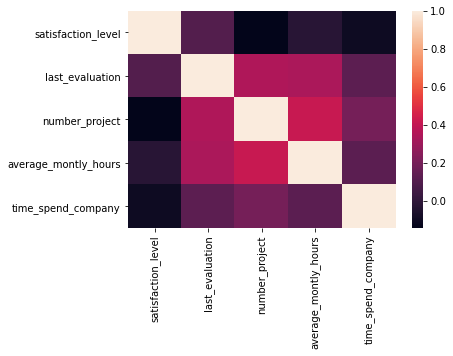

In [6]:
# тут интересно, что считать категориальными переменными, кроме очевидных
# решил убрать Work_accident, left, promotion_last_5years, поскольку они в целом являются категориальным признаком да/нет
# их конечно можно преобразовать, но задачи такой не стоит
corr = df.iloc[:, :-5].corr()
# corr.style.background_gradient(cmap='coolwarm')
sns.heatmap(corr)

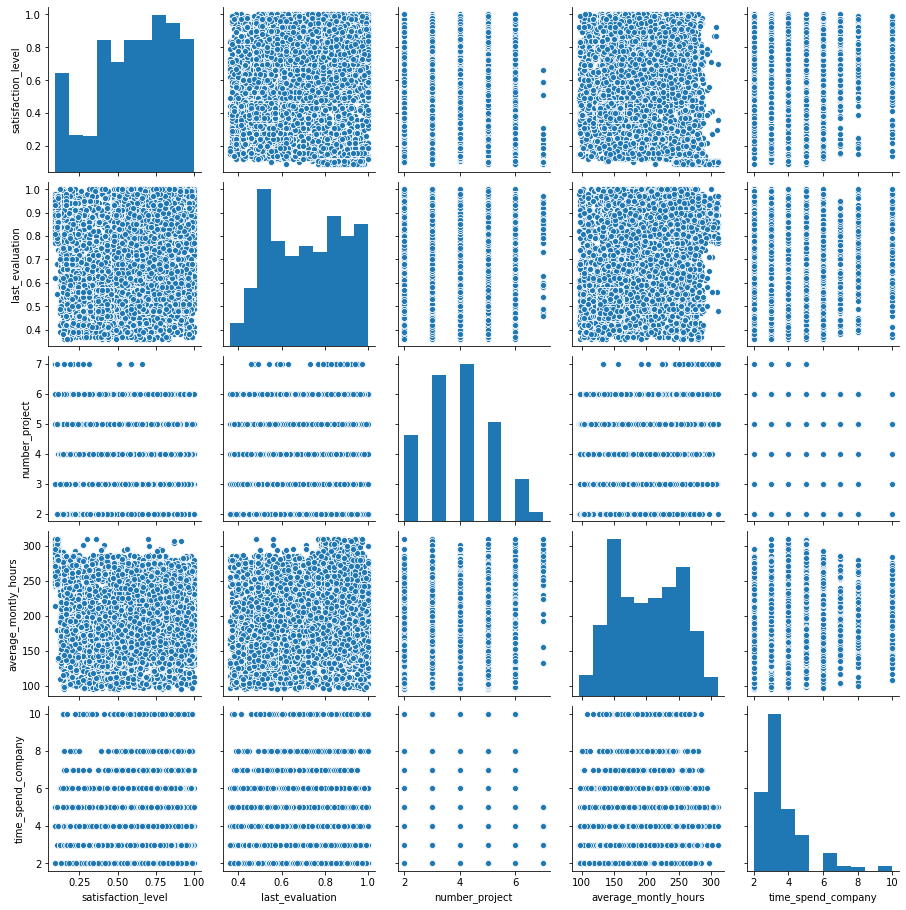

In [7]:
sns.pairplot(df.iloc[:, :-5])

Определите две самые скоррелированные и две наименее скоррелированные переменные.

In [8]:
res = corr.stack().reset_index()
res.columns=['p1', 'p2', 'К-корр']
res['Переменные'], res['val_abs'] = res.apply(lambda row: max(row.p1, row.p2) + ' - ' + min(row.p1, row.p2) if row.p1 != row.p2 else '-', axis=1), res['К-корр'].abs()
res = res[res['Переменные'] != '-'].drop_duplicates(subset ='Переменные', keep ='first')
print('Две самые скоррелированные переменные')
res.nlargest(2,'val_abs', keep='all')[['Переменные', 'К-корр']].reset_index(drop=True)

Две самые скоррелированные переменные


,Переменные,К-корр
0,number_project - average_montly_hours,0.417211
1,number_project - last_evaluation,0.349333


In [9]:
print('Две наименее скоррелированные переменные')
res.nsmallest(2,'val_abs', keep='all')[['Переменные', 'К-корр']].reset_index(drop=True)

Две наименее скоррелированные переменные


,Переменные,К-корр
0,satisfaction_level - average_montly_hours,-0.020048
1,time_spend_company - satisfaction_level,-0.100866


---
4. Рассчитайте сколько сотрудников работает в каждом департаменте.
---

In [10]:
res = df.groupby('department').size().to_frame().reset_index()
res.columns = ['Департамент', 'Кол-во сотрудников']
res

,Департамент,Кол-во сотрудников
0,IT,1227
1,RandD,787
2,accounting,767
3,hr,739
4,management,630
5,marketing,858
6,product_mng,902
7,sales,4140
8,support,2229
9,technical,2720


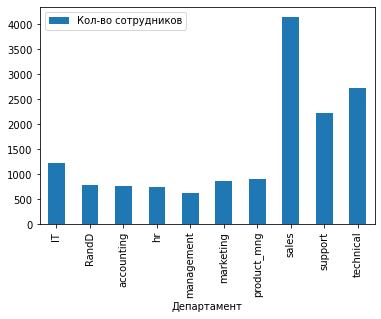

In [11]:
res.set_index('Департамент').plot(kind='bar')

---
5. Показать распределение сотрудников по зарплатам.
---

In [12]:
# можно так, через groupby
salary_order = {'low': 0, 'medium': 1, 'high': 2} # для красивости и упорядоченности
res = df.groupby('salary').size().to_frame().reset_index().sort_values(by=['salary'], key=lambda row: row.map(salary_order))
res.columns = ['Зарплата', 'Кол-во сотрудников']
res

,Зарплата,Кол-во сотрудников
1,low,7316
2,medium,6446
0,high,1237


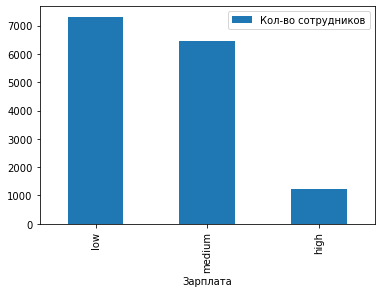

In [13]:
res.set_index('Зарплата').plot(kind='bar')

---
6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности
---

In [14]:
# можно по-другому
res = df.pivot_table(index = 'department', columns = 'salary', aggfunc = 'size')[['low', 'medium','high']]
res

salary,low,medium,high
department,,,
IT,609,535,83
RandD,364,372,51
accounting,358,335,74
hr,335,359,45
management,180,225,225
marketing,402,376,80
product_mng,451,383,68
sales,2099,1772,269
support,1146,942,141


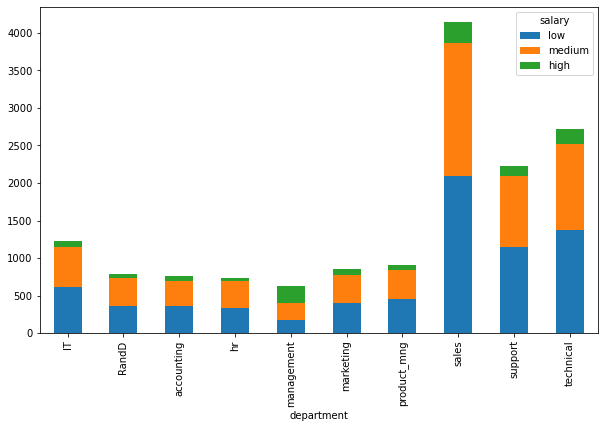

In [15]:
res.plot(kind='bar', stacked=True, figsize=(10, 6))
# res

---
7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом
---

In [16]:
# давайте проверим (исхожу из того, что итеется в виду high и low salary])
df_high = df[df.salary=='high']['average_montly_hours']
df_low = df[df.salary=='low']['average_montly_hours']
print('Средние (high, low):', df_high.mean(), df_low.mean())

Средние (high, low): 199.86742118027485 200.9965828321487


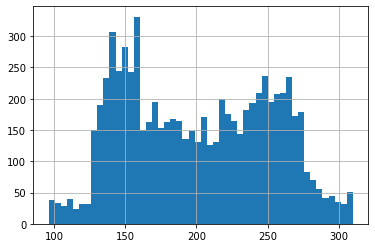

In [17]:
# не совсем нормальное распределение, конечно
# более того, пока выходит, что с меньшим окладом люди проводят на работе в среднем больше времени
df_low.hist(bins=50)

In [18]:
t, p  = stats.ttest_ind(df_high,df_low,equal_var=False)
t, p
# получается слишком большой p, чтобы говорить о различиях выборок и опровергать нулевую гипотезу

(-0.7624331665385475, 0.4459045542257889)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DA1F441160>]],
      dtype=object)

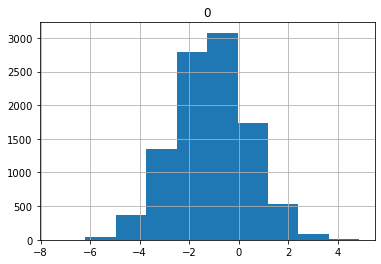

In [19]:
# попробуем бутстрэп
means = []
for i in range(10000):
    means.append(df_high.sample(frac=1, replace=True).mean() - df_low.sample(frac=1, replace=True).mean())

pd.DataFrame(means).hist()

In [20]:
confidence_interval = pd.Series(means).quantile([0.025, 0.975])
confidence_interval

0.025   -4.070683
0.975    1.805243
dtype: float64

In [21]:
# так картина нагляднее
# однако, с учетом доверительного интервала, мы не можем утверждать,
# что люди с высоким окладом проводят на работе больше (или меньше) времени, чем с низким

---
8. Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):
 - Доля сотрудников с повышением за последние 5 лет
 - Средняя степень удовлетворенности
 - Среднее количество проектов
---

In [22]:
res = (df.pivot_table(index='left',
    values=['promotion_last_5years', 'satisfaction_level', 'number_project'],
    aggfunc={'promotion_last_5years': 'mean', 'satisfaction_level': 'mean', 'number_project': 'mean'})
    .reset_index()
        )
res['left'] = res['left'].apply(lambda x: 'Уволился' if x==1 else 'Работает')
res.rename(columns={'left': 'Статус', 'number_project': 'Среднее количество проектов', 'satisfaction_level': 'Средняя степень удовлетворенности', 'promotion_last_5years': 'Доля сотрудников с повышением за последние 5 лет'}, inplace=True)
res

,Статус,Среднее количество проектов,Доля сотрудников с повышением за последние 5 лет,Средняя степень удовлетворенности
0,Работает,3.786664,0.026251,0.666810
1,Уволился,3.855503,0.005321,0.440098


---
- Разделить данные на тестовую и обучающую выборки.
- Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary)
- Оценить качество модели на тестовой выборке
---

In [23]:
# "кроме department и salary)" - имееется в виду, их не брать? Исхожу из этого предположения
df_lda = df.iloc[:, :-2]
df_lda

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0
14995,0.37,0.48,2,160,3,0,1,0
14996,0.37,0.53,2,143,3,0,1,0
14997,0.11,0.96,6,280,4,0,1,0


In [24]:
# тренируем
# тестовая выборка - 30%
data_train, data_test = train_test_split(df_lda, test_size=0.3)
y_train, y_test = data_train['left'], data_test['left']
del data_train['left']
del data_test['left']

lda = LinearDiscriminantAnalysis()
lda.fit(data_train, y_train)

# проверяем
print('Accuracy: ', accuracy_score(y_test, lda.predict(data_test)))


Accuracy:  0.7662222222222222


In [25]:
# pd.DataFrame([y_test.values, lda.predict(data_test)]).T

In [26]:
# Средненькое качество получилось, но в целом предсказательная сила есть.